# Week Nine Work for Capstone Project. 
# Load Data Set

# Task: Build an Artificial Neural Network to identify the customers who will be leaving the bank, based on the data of all customers over the past three months.

# Task A:

## Load Churn_Modelling.csv dataset

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
# Load the dataset Churn_Modelling.csv.
df = pd.read_csv('./Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Drop the customers' personal data columns that will not be useful for analysis. (Hint: First three columns)

In [7]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

## Prepare independent variables X and dependent variable Y (Exited).

In [8]:
X=df.drop(['Exited'], axis=1)

In [9]:
y=df.iloc[:,-1]

## 4.LabelEncode the Gender column, from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [11]:
X['Gender'] = encoder.fit_transform(X['Gender'])

In [12]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.00,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


In [13]:
encoder.classes_

array(['Female', 'Male'], dtype=object)

## OneHotEncode the Geography column

In [14]:
X['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [15]:
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [16]:
dummy_columns = pd.get_dummies(X['Geography'])

In [17]:
dummy_columns

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [18]:
X = pd.get_dummies(data=X, columns=['Geography'])

In [19]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,False,True,False


## Perform a train test split in the ratio 80:20 and random_state 0

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
X_train.shape

(8000, 12)

In [22]:
X_test.shape

(2000, 12)

In [23]:
y_train.shape

(8000,)

In [24]:
y_test.shape

(2000,)

## Perform Feature scaling on X_train and X_test using StandardScaler

In [25]:
standard_scaler = StandardScaler()

In [26]:
X_train = standard_scaler.fit_transform(X_train)

In [27]:
X_test = standard_scaler.transform(X_test)

## Build a Keras Sequential model with the following layers
## Dense layer with 6 neurons and activation relu
## Dense layer with 6 neurons and activation relu
# Dense layer with 1 neuron and activation sigmoid

## Choose the correlation of all users with User 1 only.

In [28]:
model = tf.keras.Sequential()

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model

<Sequential name=sequential, built=False>

## Compile the model with Adam optimizer, binary_crossentropy loss and metric accuracy

In [31]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the model for 10 epochs and batch size 10

In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=10)

Epoch 1/10


720/720 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.7666 - loss: 0.5436 - val_accuracy: 0.8050 - val_loss: 0.4477
Epoch 2/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.8122 - loss: 0.4326 - val_accuracy: 0.8112 - val_loss: 0.4151
Epoch 3/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.8227 - loss: 0.4130 - val_accuracy: 0.8288 - val_loss: 0.3998
Epoch 4/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.8254 - loss: 0.4072 - val_accuracy: 0.8350 - val_loss: 0.3916
Epoch 5/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.8383 - loss: 0.3914 - val_accuracy: 0.8375 - val_loss: 0.3770
Epoch 6/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.8337 - loss: 0.3935 - val_accuracy: 0.8425 - val_loss: 0.3663
Epoch 7/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.8384 - loss: 0.3799 - val_accuracy: 0.8500 - val_loss: 0.3541
Epoch 8/10
720/720 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.8447 - loss: 0.3714 - val_accurac

## Evaluate the model on the test set; print the accuracy and confusion matrix

In [33]:
def plotModelHistory(h):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))

    ax[0].plot(h.history['loss'])
    ax[0].plot(h.history['val_loss'])
    ax[0].legend(['loss', 'val_loss'])
    ax[0].title.set_text("Train loss vs Validation Loss")

    ax[1].plot(h.history['accuracy'])
    ax[1].plot(h.history['val_accuracy'])
    ax[1].legend(['accuracy', 'val_accuracy'])
    ax[1].title.set_text("Train accuracy vs Validation accuracy")

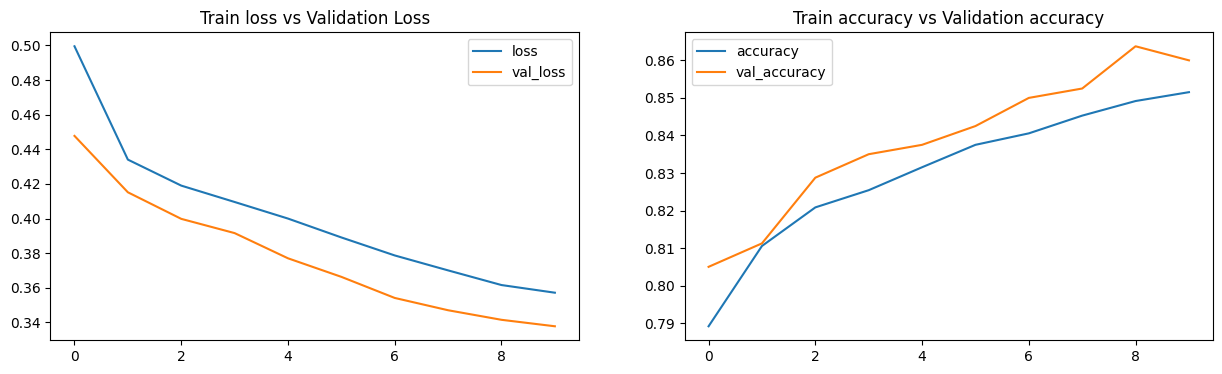

In [34]:
plotModelHistory(history)

## In class we used 15 Epocs and it improved the accuracy

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (10, 12)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (10, 6)                │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (10, 6)                │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (10, 1)                │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256 (1.00 KB)

In [36]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [37]:
y_pred

array([[0.33026767],
       [0.30374056],
       [0.11761035],
       ...,
       [0.34075996],
       [0.20196626],
       [0.22466195]], dtype=float32)

In [38]:
y_pred = (y_pred > 0.5) * 1

In [39]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [40]:
y_pred.ravel()

array([0, 0, 0, ..., 0, 0, 0])

## Print the Confusion Matrix and Accuracy

In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
print(cm)

[[1517   78]
 [ 203  202]]


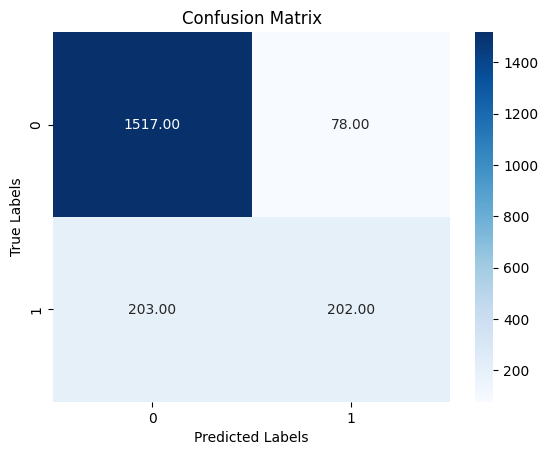

In [43]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# model.evaluate(y_test, y_pred)

## Task B:
## Use the built ANN model to predict if the customer with the following information will leave the bank:
## Geography: France
## Credit Score: 600
## Gender: Male
## Age: 40 years
## Tenure: 3 years
## Balance: $60000
## Number of Products: 2
## Does this customer have a credit card? Yes
## Is this customer an Active Member: Yes
## Estimated Salary: $50000
## So, should we let the customer go?

In [44]:
model.predict(standard_scaler.transform([ [600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0, 0]])) > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/opt/anaconda3/envs/ipykernel_py3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[False]])